**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Daniel Hernández Fernández

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Configurar pd para mostrar todas las columnas del df.
pd.options.display.max_columns = None

In [ ]:
#montar el drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [ ]:
happiness_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VisualizacionDatosPython/happiness_report.csv')

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [ ]:
mexico_df = happiness_df[happiness_df['Country or region'] == 'Mexico'].copy()
mexico_df.set_index('Country or region', inplace=True)
mexico_df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

In [ ]:
mexico_valor_score = mexico_df.loc['Mexico', 'Score']
mexico_valor_score

6.595

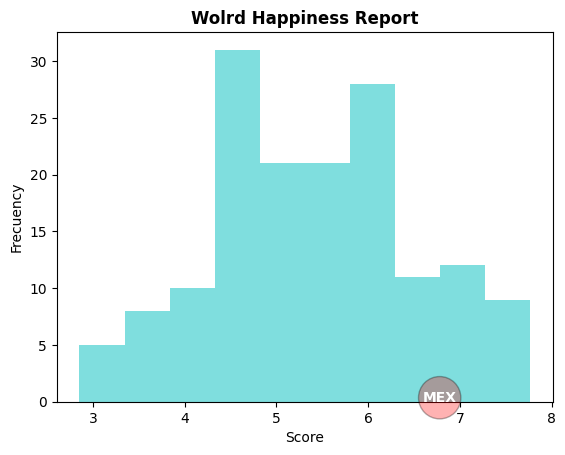

In [ ]:
plt.hist(happiness_df['Score'], bins = 10, color = 'c', alpha = 0.5)
bbox_parametros = dict(facecolor='red', edgecolor='black', boxstyle='circle', alpha = 0.3)
plt.text(mexico_valor_score, 0, 'MEX', color = 'white', weight = 'bold', bbox = bbox_parametros)
plt.title('Wolrd Happiness Report', fontweight = 'bold')
plt.xlabel('Score')
plt.ylabel('Frecuency')

plt.show()





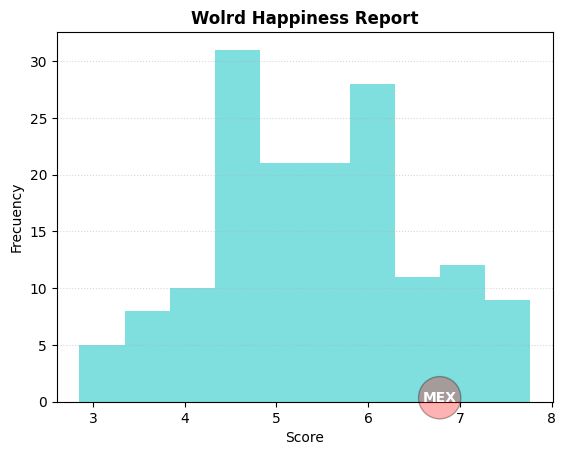

In [ ]:
plt.hist(happiness_df['Score'], bins = 10, color = 'c', alpha = 0.5)

bbox_parametros = dict(facecolor='red', edgecolor='black', boxstyle='circle', alpha = 0.3)
plt.text(mexico_valor_score, 0, 'MEX', color = 'white', weight = 'bold', bbox = bbox_parametros)

plt.title('Wolrd Happiness Report', fontweight = 'bold')
plt.xlabel('Score')
plt.ylabel('Frecuency')

plt.yticks(np.arange(0, 34, 5))
plt.grid(axis = 'y', linestyle = 'dotted', alpha = 0.5)

plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

In [ ]:
mexico_valor_healthy = mexico_df.loc['Mexico', 'Healthy life expectancy']
mexico_valor_healthy

0.861

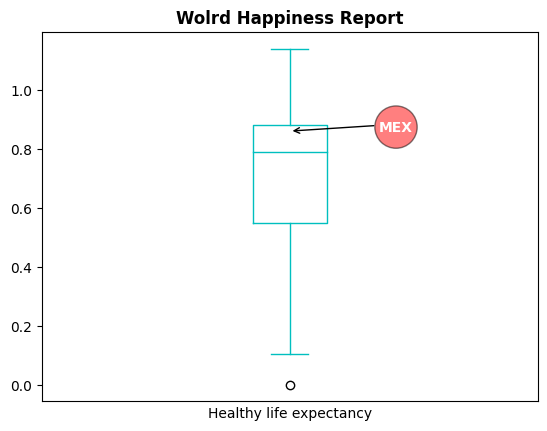

In [ ]:
plt.boxplot(happiness_df['Healthy life expectancy'],
            boxprops = dict(color = 'c'),
            whiskerprops = dict(color ='c'),
            medianprops = dict(color = 'c'),
            capprops = dict(color ='c'))

plt.xlabel('Healthy life expectancy')

bbox_parametros = dict(facecolor='red', edgecolor='black', boxstyle='circle', alpha = 0.5)
plt.text(1.18, mexico_valor_healthy, 'MEX', color = 'white', weight = 'bold', bbox = bbox_parametros)

#Flechita
plt.annotate('', xy=(1,mexico_valor_healthy),xytext=(1.175, .88),arrowprops=dict(arrowstyle='->'))

# Establecer el título del gráfico
plt.title('Wolrd Happiness Report', fontweight = 'bold')
plt.xticks([])

# Mostrar el gráfico
plt.show()


6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [ ]:
mexico_df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [ ]:
factores_mx_df = mexico_df.copy()
factores_mx_df = factores_mx_df.drop(['Overall rank', 'Score'], axis = 1).T
factores_mx_df

Country or region,Mexico
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


In [ ]:
factores_mx_df['Mexico']

GDP per capita                  1.070
Social support                  1.323
Healthy life expectancy         0.861
Freedom to make life choices    0.433
Generosity                      0.074
Perceptions of corruption       0.073
Name: Mexico, dtype: float64

In [ ]:
factores_mx_df.index

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

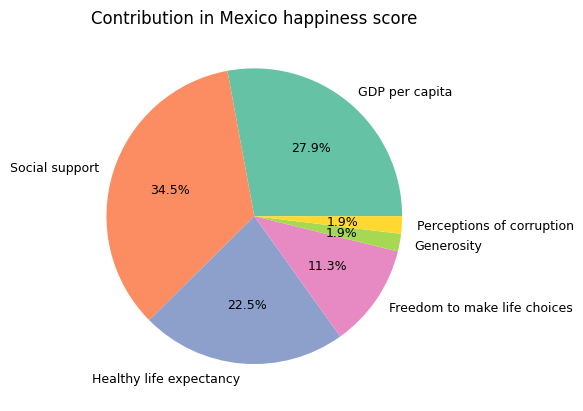

In [ ]:
plt.pie(factores_mx_df['Mexico'], labels = factores_mx_df.index,
        autopct='%1.1f%%',
        textprops={'fontsize':9},
        colors = sns.color_palette('Set2'))

plt.title('Contribution in Mexico happiness score')
plt.show()

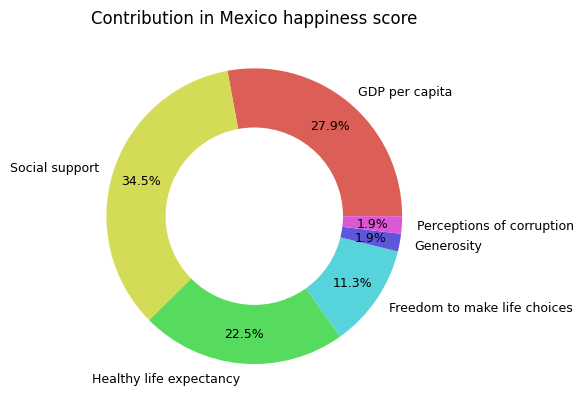

In [ ]:
plt.pie(factores_mx_df['Mexico'], labels = factores_mx_df.index,
        autopct='%1.1f%%',
        textprops={'fontsize':9},
        colors = sns.color_palette('hls', 6),
        pctdistance=0.8)

#Haciendo un circulo
circulo = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(circulo)


plt.title('Contribution in Mexico happiness score')
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [ ]:
lista_paises_felicidad = happiness_df.copy()

lista_paises_felicidad = [happiness_df.loc[happiness_df['Score'].idxmax(), 'Country or region'],
                         happiness_df.loc[happiness_df['Score'].idxmin(), 'Country or region'],
                         'United States',
                         'Mexico',
                         'China']

paises_df = happiness_df[happiness_df['Country or region'].isin(lista_paises_felicidad)].copy()

paises_df.set_index('Country or region', inplace=True)

paises_df.drop(columns = ['Score', 'Overall rank'], axis = 1, inplace = True)

paises_df = paises_df.T
paises_df

Country or region,Finland,United States,Mexico,China,South Sudan
GDP per capita,1.340,1.433,1.070,1.029,0.306
Social support,1.587,1.457,1.323,1.125,0.575
Healthy life expectancy,0.986,0.874,0.861,0.893,0.295
Freedom to make life choices,0.596,0.454,0.433,0.521,0.010
Generosity,0.153,0.280,0.074,0.058,0.202
Perceptions of corruption,0.393,0.128,0.073,0.100,0.091


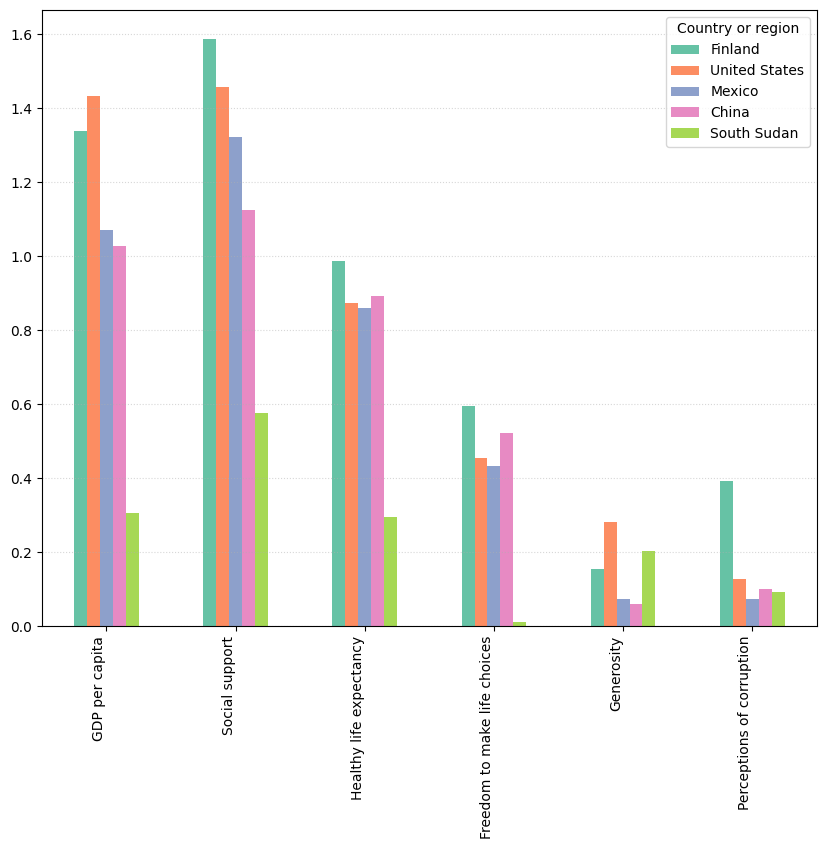

In [ ]:
ax = paises_df.plot.bar(figsize = (10,8), color = sns.color_palette('Set2'))
ax.set_xticklabels(paises_df.index, rotation=90, ha='right')
plt.grid(axis = 'y', linestyle = 'dotted', alpha = 0.5)

plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

In [ ]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
columnas_para_scatter = happiness_df.columns[3:].copy()
columnas_para_scatter

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

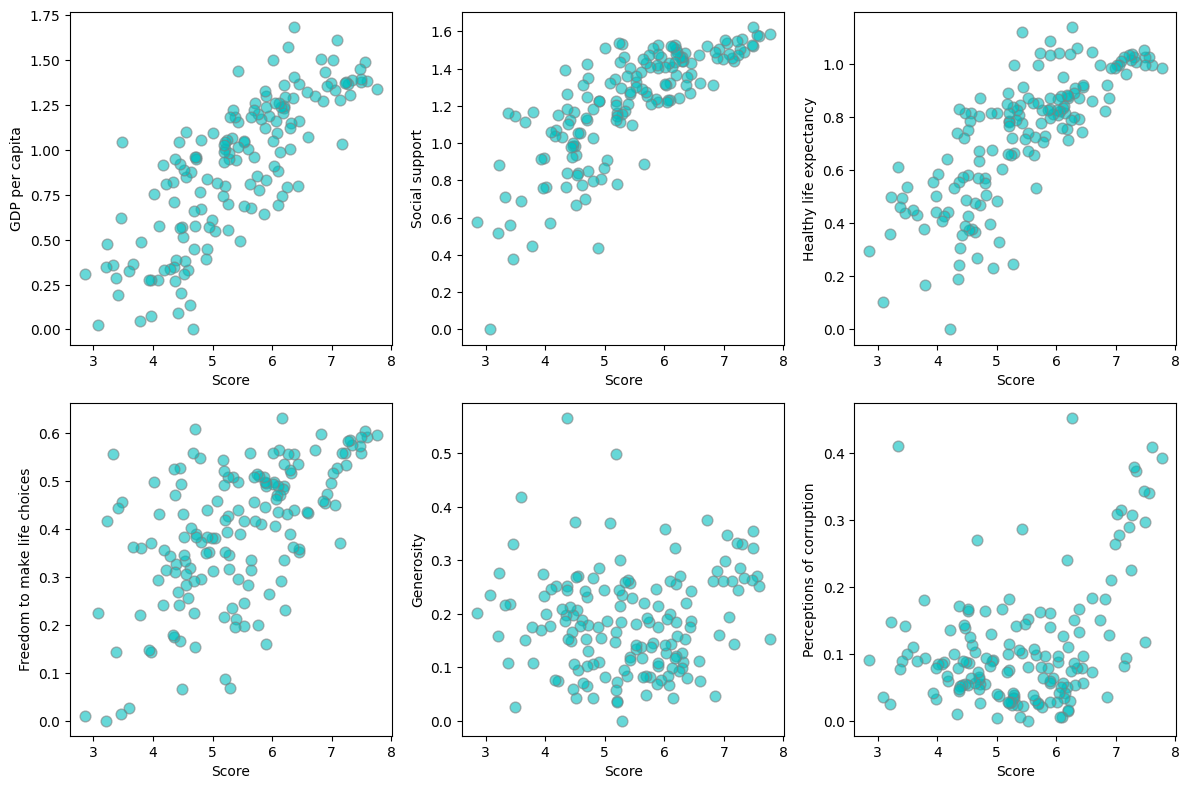

In [ ]:
filas_subplot = 2
columnas_subplot = 3
fig, ax = plt.subplots(filas_subplot, columnas_subplot, figsize=(12, 8))


# Iterar sobre las columnas y crear scatter plots en los subplots correspondientes
for i in range(filas_subplot):
    for j in range(columnas_subplot):
        indice = i * columnas_subplot + j
        if indice < len(columnas_para_scatter):
            nombre_factor = columnas_para_scatter[indice]
            ax[i, j].scatter(happiness_df['Score'], happiness_df[nombre_factor],
                              c = 'c',
                              alpha = 0.6,
                              edgecolor = 'gray',
                              s = 60)

            ax[i, j].set_xlabel('Score')
            ax[i, j].set_ylabel(nombre_factor)

plt.tight_layout()
plt.show()


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

In [ ]:
happiness_correlacion_df = happiness_df.copy()
happiness_correlacion_df.drop(['Country or region'], axis = 1, inplace = True)
happiness_correlacion_df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


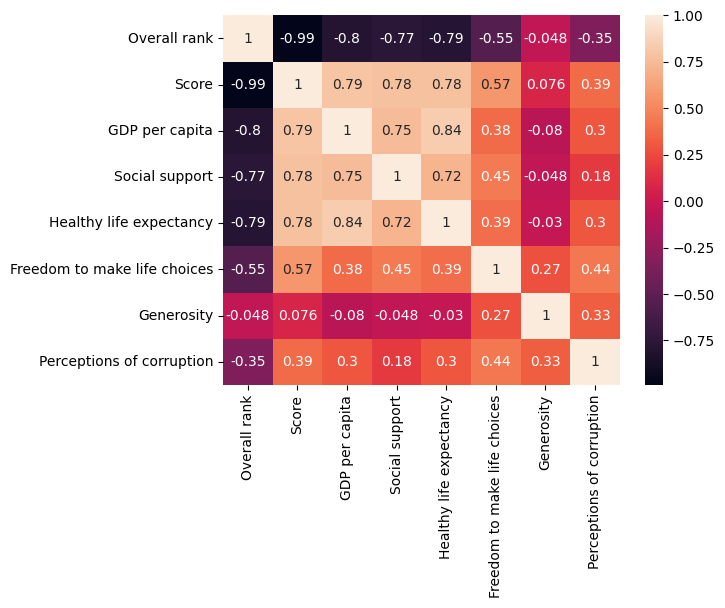

In [ ]:
sns.heatmap(happiness_correlacion_df.corr(), annot=True)
plt.show()

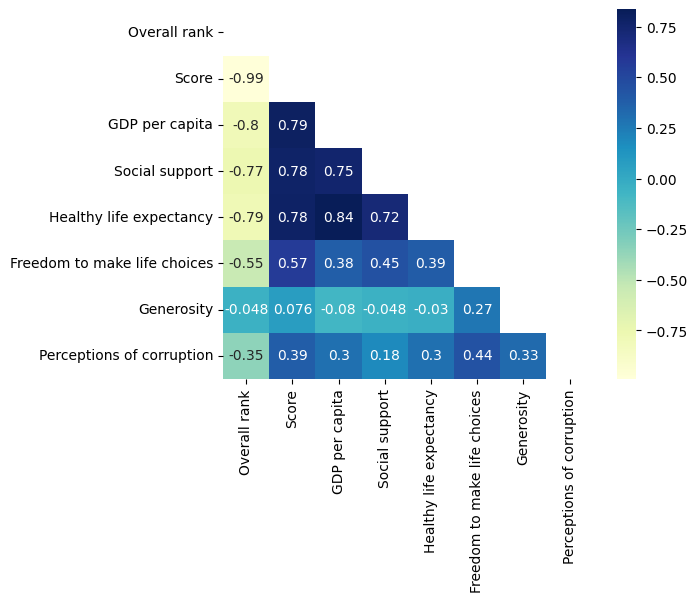

In [ ]:
#Usando documentacion
mascara = np.zeros_like(happiness_correlacion_df.corr())
mascara[np.triu_indices_from(mascara)] = True

sns.heatmap(happiness_correlacion_df.corr(), annot=True, cmap = 'YlGnBu', mask = mascara, square = True)

plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [ ]:
metadata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VisualizacionDatosPython/Metadata.csv')

In [ ]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   217 non-null    object
 3   SpecialNotes  94 non-null     object
 4   TableName     263 non-null    object
dtypes: object(5)
memory usage: 10.4+ KB


In [ ]:
metadata_df = metadata_df.rename(columns = {'TableName': 'Country or region'})

In [ ]:
metadata_df

,Country Code,Region,IncomeGroup,SpecialNotes,Country or region
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [ ]:
happiness_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
regiones_df = pd.merge(happiness_df, metadata_df, on='Country or region', how='outer').copy()

In [ ]:
regiones_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIR,Latin America & Caribbean,High income,NaN
279,NaN,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VUT,East Asia & Pacific,Lower middle income,NaN
280,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WLD,NaN,NaN,World aggregate.
281,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WSM,East Asia & Pacific,Upper middle income,Fiscal year ends on June 30; reporting period ...


In [ ]:
regiones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 282
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    float64
 1   Country or region             283 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Country Code                  263 non-null    object 
 10  Region                        217 non-null    object 
 11  IncomeGroup                   217 non-null    object 
 12  SpecialNotes                  94 non-null     object 
dtypes: fl

In [ ]:
felicidad_promedio_region = regiones_df.groupby('Region')['Score'].mean().copy()

In [ ]:
felicidad_promedio_region

Region
East Asia & Pacific           5.658769
Europe & Central Asia         6.104174
Latin America & Caribbean     6.007579
Middle East & North Africa    5.757429
North America                 7.085000
South Asia                    4.526857
Sub-Saharan Africa            4.260000
Name: Score, dtype: float64

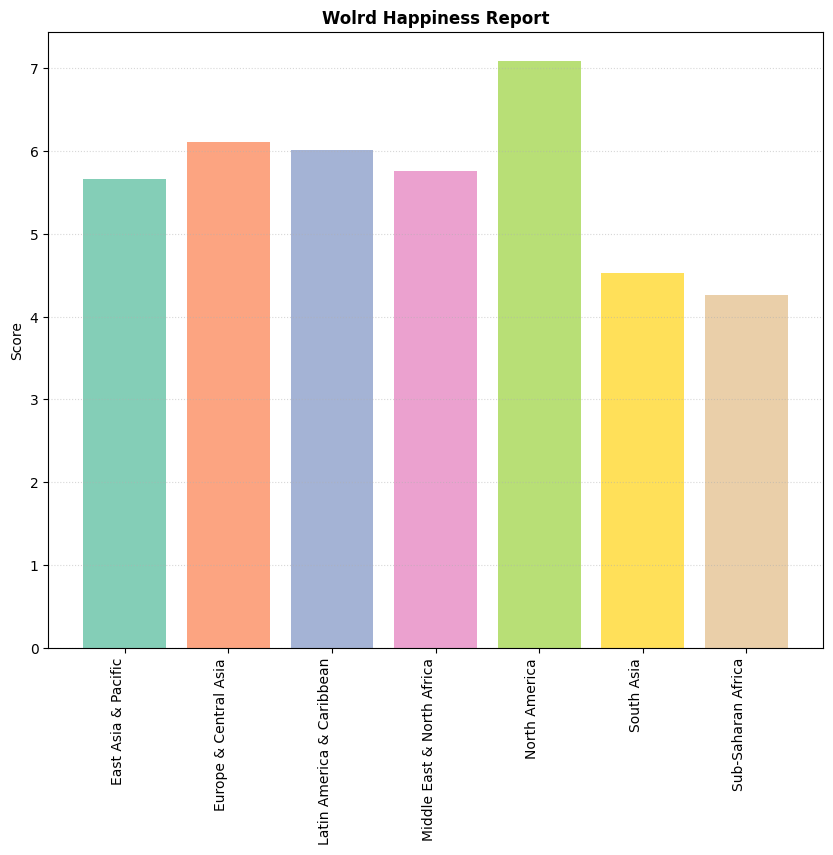

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(felicidad_promedio_region.index, felicidad_promedio_region,
       color = sns.color_palette('Set2'),
       alpha = 0.8
       )

plt.title('Wolrd Happiness Report', fontweight = 'bold')
plt.ylabel('Score')

ax.set_xticks(range(len(felicidad_promedio_region.index)))
ax.set_xticklabels(felicidad_promedio_region.index, rotation=90, ha='right')
plt.grid(axis = 'y', linestyle = 'dotted', alpha = 0.5)


plt.show()